<a href="https://colab.research.google.com/github/svetaepc/Python_START/blob/master/update_stat_dz_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Цель - получить больше информации о лошадях, которые умерли или были подвергнуты эвтаназии.

In [3]:
list_columns = ['surgery?', 'age', 'rectal_temperature', 'pulse', 'respiratory_rate', 
                'temperature_of_extremities', 'pain', 'outcome']

df = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv', header=None, 
                          na_values='?', usecols = [0, 1, 3, 4, 5, 6, 10, 22], names = list_columns)

In [4]:
df.sample(4)

,surgery?,age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
273,1.0,1,37.7,120.0,28.0,3.0,5.0,2.0
221,1.0,1,38.5,92.0,40.0,4.0,2.0,1.0
203,2.0,1,37.2,36.0,9.0,1.0,2.0,1.0
131,2.0,1,37.6,88.0,36.0,3.0,3.0,2.0


In [5]:
df.isna().sum()

surgery?                       1
age                            0
rectal_temperature            60
pulse                         24
respiratory_rate              58
temperature_of_extremities    56
pain                          55
outcome                        1
dtype: int64

In [6]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

surgery?                       0.333333
age                            0.000000
rectal_temperature            20.000000
pulse                          8.000000
respiratory_rate              19.333333
temperature_of_extremities    18.666667
pain                          18.333333
outcome                        0.333333
dtype: float64

In [7]:
df.dtypes.value_counts()

float64    7
int64      1
dtype: int64

In [8]:
df['outcome'].value_counts()

1.0    178
2.0     77
3.0     44
Name: outcome, dtype: int64

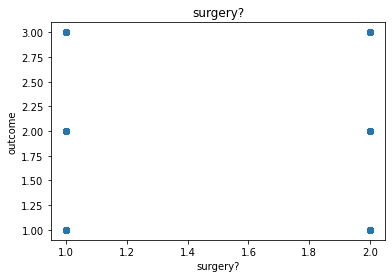

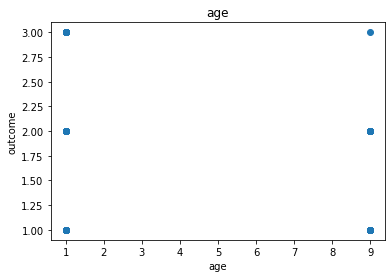

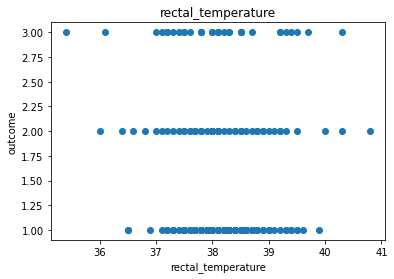

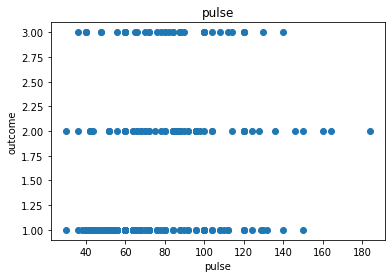

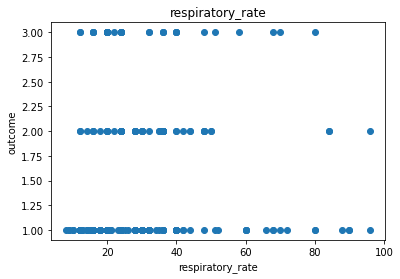

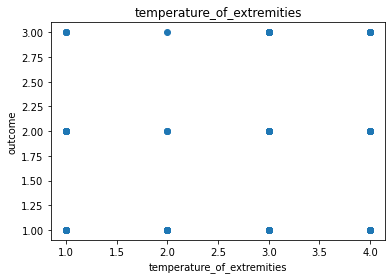

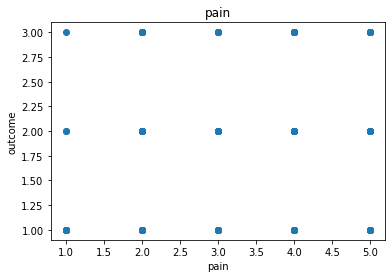

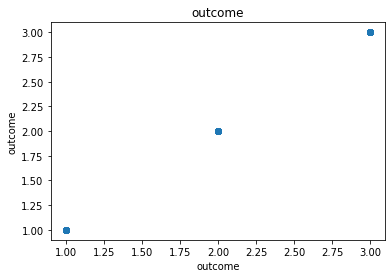

In [ ]:
target=df['outcome']

for i in range(len(df.columns)):
  fig=plt.figure()
  ax1=fig.add_subplot(1,1,1)
  ax1.scatter(df[[df.columns[i]]], target)
  #
  ax1.set_title(df.columns[i])
  #
  ax1.set_xlabel(df.columns[i])
  ax1.set_ylabel('outcome')

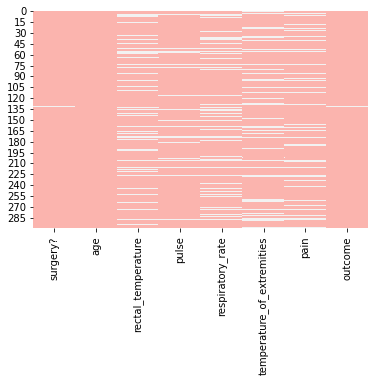

In [9]:
sns.heatmap(df.isnull(),cbar=False, cmap='Pastel1')

<function matplotlib.pyplot.show(*args, **kw)>

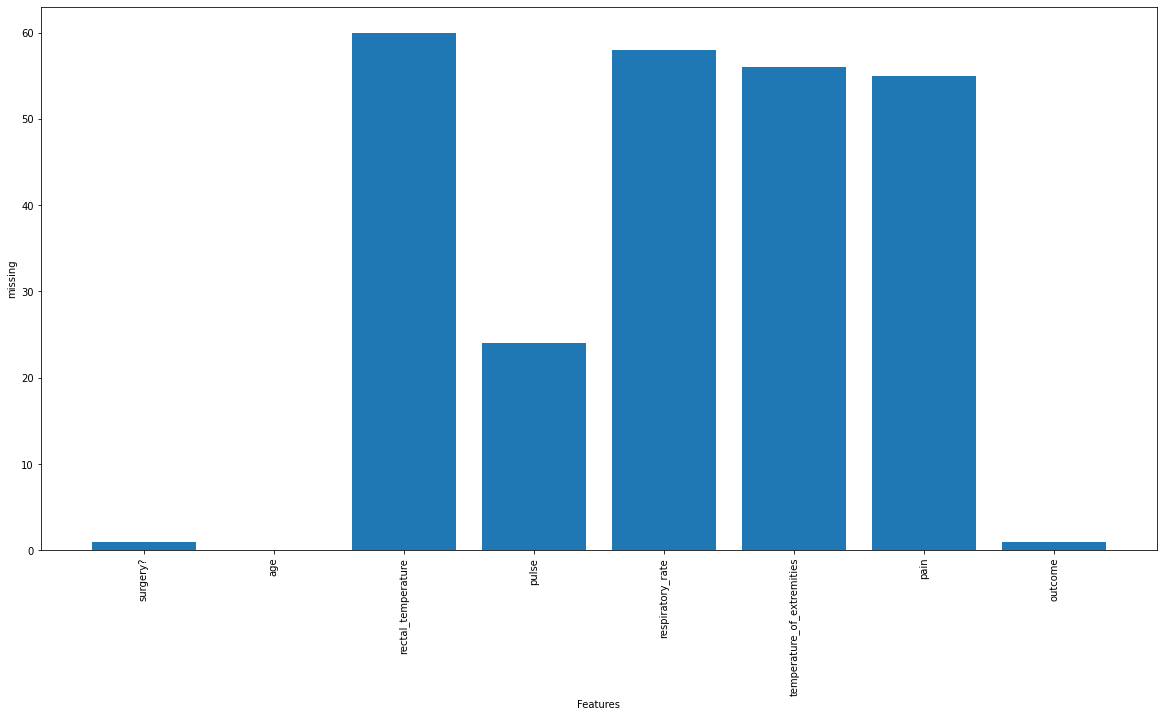

In [10]:
null = df.isnull().sum()

plt.figure(figsize=(20,10))
plt.bar(range(len(null)),null)
plt.xlabel('Features')
plt.ylabel('missing')
plt.xticks(list(range(len(df.columns))), list(df.columns.values), rotation='vertical')
plt.show

In [11]:
df.dtypes

surgery?                      float64
age                             int64
rectal_temperature            float64
pulse                         float64
respiratory_rate              float64
temperature_of_extremities    float64
pain                          float64
outcome                       float64
dtype: object

In [12]:
df.isna().sum()

surgery?                       1
age                            0
rectal_temperature            60
pulse                         24
respiratory_rate              58
temperature_of_extremities    56
pain                          55
outcome                        1
dtype: int64

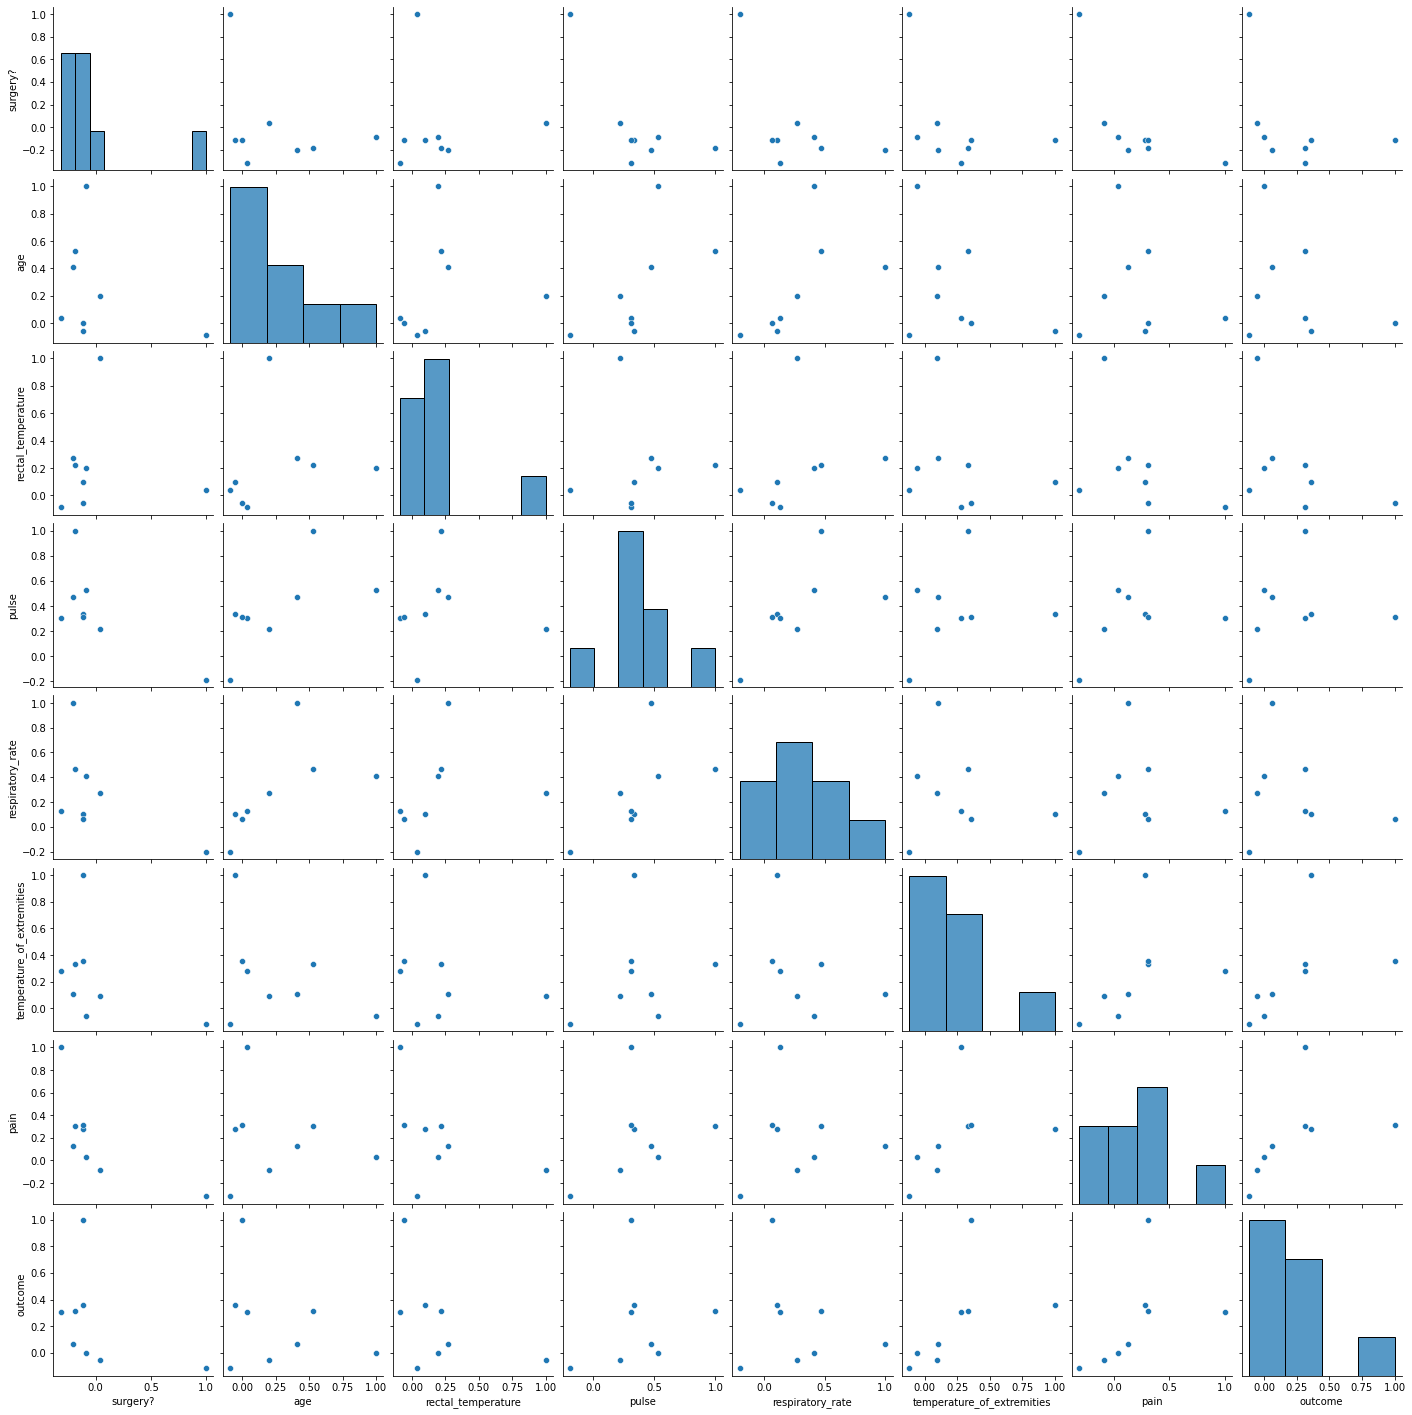

In [ ]:
sns.pairplot(df.corr())

plt.show()

In [ ]:
df.sample(7)

,surgery?,age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
236,2.0,1,38.2,42.0,26.0,1.0,3.0,1.0
38,2.0,1,38.6,52.0,NaN,1.0,3.0,1.0
64,1.0,1,39.0,64.0,36.0,3.0,3.0,1.0
248,1.0,1,38.0,108.0,60.0,2.0,4.0,1.0
79,1.0,1,37.5,96.0,18.0,1.0,3.0,1.0
125,1.0,1,38.0,42.0,68.0,4.0,3.0,1.0
60,2.0,1,37.8,48.0,32.0,1.0,2.0,1.0


In [13]:
df['outcome'].value_counts()

1.0    178
2.0     77
3.0     44
Name: outcome, dtype: int64

In [30]:
df['surgery?'].value_counts()

1.0    180
2.0    119
Name: surgery?, dtype: int64

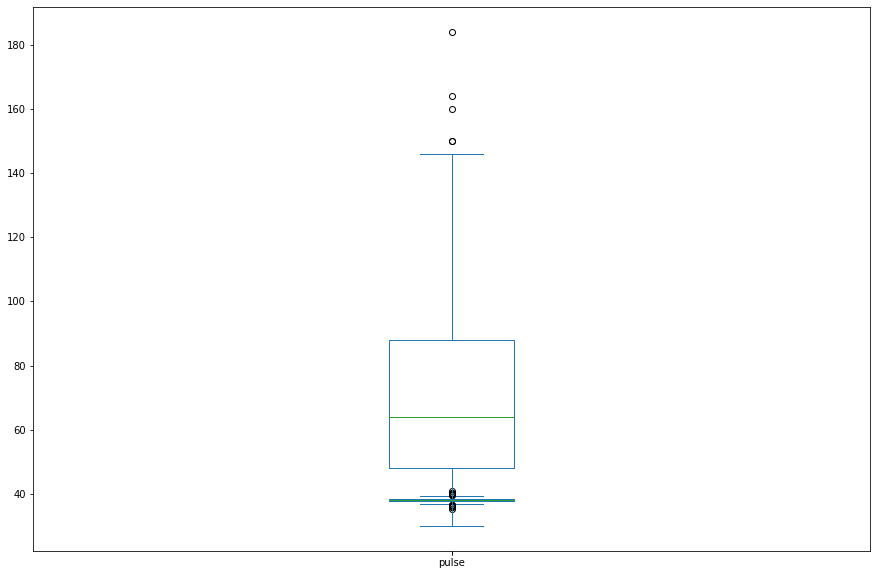

In [15]:
plt.figure(figsize=(15,10))
df['rectal_temperature'].plot.box()
df['pulse'].plot.box()

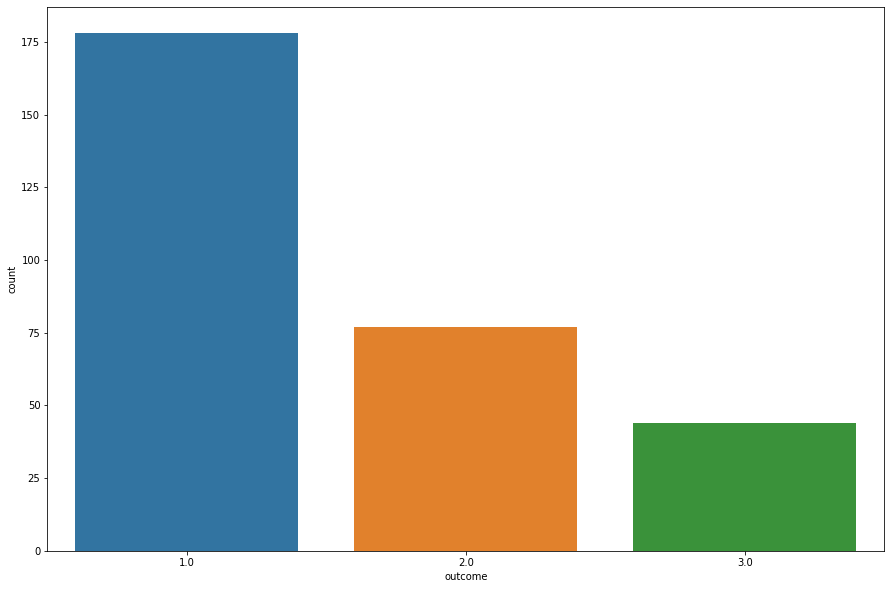

In [16]:
plt.figure(figsize=(15,10))
sns.countplot(data=df, x='outcome')

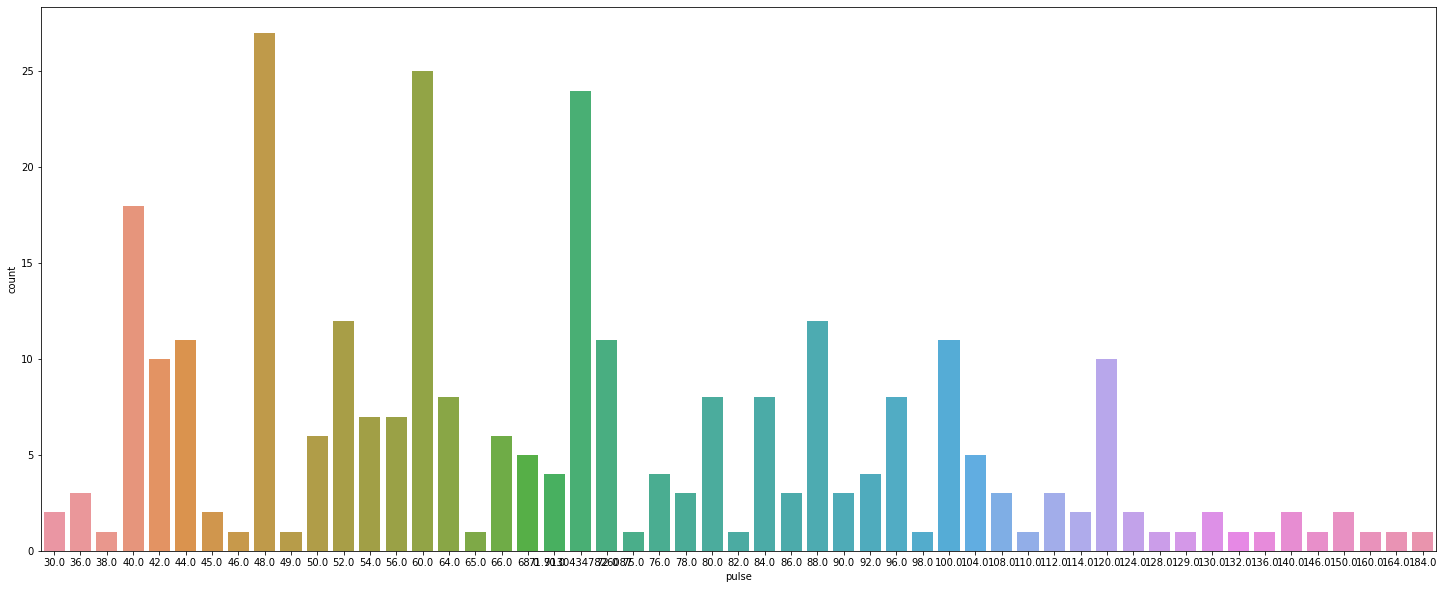

In [32]:
plt.figure(figsize=(25,10))
sns.countplot(data=df, x='pulse')


Подавляющее большинство погибших лошадей испытывали боль. Лошади, подвергшиеся эвтаназии, испытывали сильную или депрессивную боль.
Из всех лошадей, которые умерли и не подверглись хирургическому вмешательству, большинство испытывало сильную боль.

У большинства погибших лошадей пульс составлял примерно 80-100 ударов в минуту.




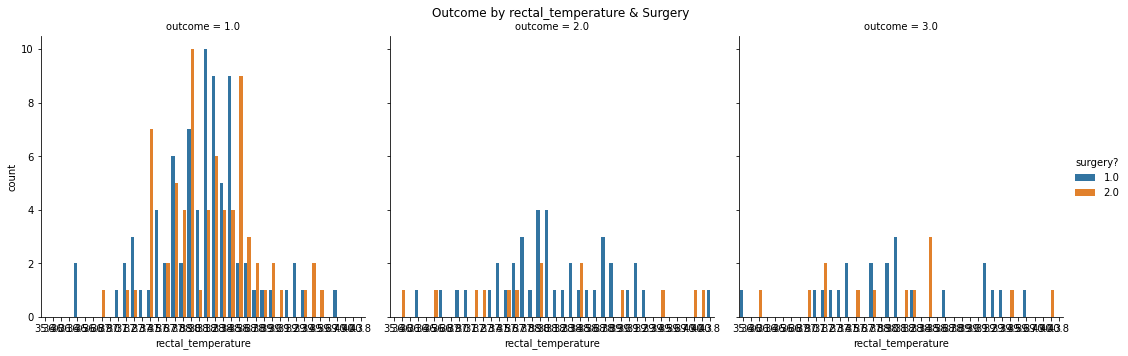

In [ ]:
g = sns.catplot(data=df, x='rectal_temperature', col='outcome', hue='surgery?', kind='count');
g.fig.suptitle('Outcome by rectal_temperature & Surgery');
plt.subplots_adjust(top=0.9)

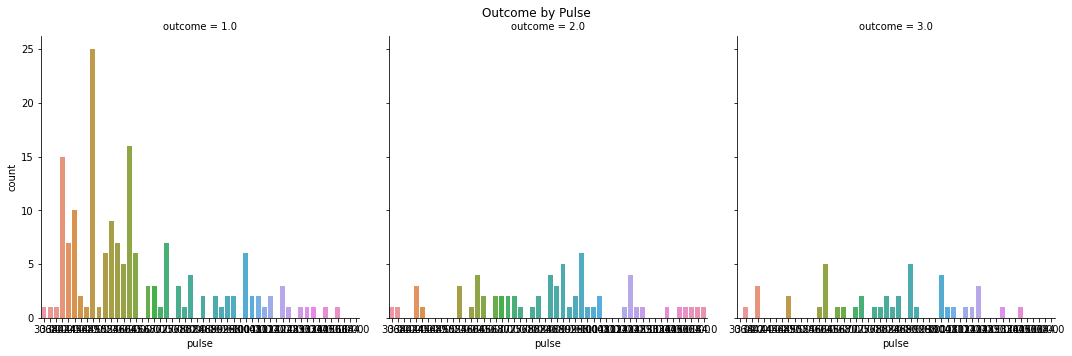

In [ ]:
g = sns.catplot(data=df, x='pulse', col='outcome', kind='count');
g.fig.suptitle('Outcome by Pulse');
plt.subplots_adjust(top=0.9)

Много пропущенных  данных в dataset, заполним их данными, которые меньше исказят данные - заполним средними и модами

In [18]:

df.pulse = df.pulse.fillna(value=df.pulse.mean())
df.respiratory_rate = df.respiratory_rate.fillna(value=df.respiratory_rate.mean())
df.temperature_of_extremities = df.temperature_of_extremities.fillna(value=df.temperature_of_extremities.mode()[0])
df.rectal_temperature = df.rectal_temperature.fillna(value=df.rectal_temperature.mean())
df.pain = df.pain.fillna(value=df.pain.mode()[0])
df.sample(5)

,surgery?,age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
225,2.0,1,38.400000,54.0,24.000000,1.0,1.0,1.0
153,2.0,1,38.600000,48.0,20.000000,3.0,1.0,1.0
282,1.0,1,38.167917,70.0,16.000000,3.0,2.0,2.0
152,1.0,1,38.167917,100.0,30.417355,3.0,3.0,1.0
267,2.0,1,38.300000,54.0,18.000000,3.0,2.0,1.0


In [20]:
df.isna().sum()

surgery?                      1
age                           0
rectal_temperature            0
pulse                         0
respiratory_rate              0
temperature_of_extremities    0
pain                          0
outcome                       1
dtype: int64

In [23]:
# Удалим - с неизвестным исходом
df[df['surgery?'].isna()]
df.drop(index=132,inplace=True)
df.isna().sum()


surgery?                      0
age                           0
rectal_temperature            0
pulse                         0
respiratory_rate              0
temperature_of_extremities    0
pain                          0
outcome                       0
dtype: int64

Попробуем (поскольку о больных лошадках знаем меньше чем ничего!) применить к эттим данным несколько моделей ML

PS:(результат, конечно разочарует) - на полном датасете из Kaggle он повыше.

In [24]:
# Импортируем модели (с запасом  :)

from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import export_graphviz
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
# from sklearn.pipeline import Pipeline

# from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# from sklearn import preprocessing
# from sklearn import utils

In [25]:
# Разделим данные на test и train и выделим то что хотим предсказывать (исход)

X = df.loc[:,df.columns!='outcome']
y = df['outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [27]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', max_iter=10000)
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
log_regr_score1 = clf.score(X_test, Y_test)
print('log_regr_score: ',log_regr_score1)
confusion_matrix(Y_test,Y_pred)

log_regr_score:  0.575


array([[57, 13,  0],
       [17, 11,  1],
       [12,  8,  1]])

In [28]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
KN_score = clf.score(X_test, Y_test)
print('KN_score ', KN_score)
confusion_matrix(Y_test, Y_pred)

KN_score  0.55


array([[59,  8,  3],
       [21,  6,  2],
       [14,  6,  1]])

In [29]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
NB_score = clf.score(X_test, Y_test)
print('NB_score ',NB_score)
confusion_matrix(Y_test, Y_pred)

NB_score  0.575


array([[53, 15,  2],
       [12, 12,  5],
       [10,  7,  4]])

In [ ]:
# PS:(результат неважный) - на полном датасете из Kaggle он у многих повыше на разных моделях

In [39]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [40]:
horse_data = '/content/drive/MyDrive/horse.csv'

In [42]:
data = pd.read_csv(horse_data)
pd.isnull(data).sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [43]:
data = data.dropna(how = 'any', axis = 'rows')
pd.isnull(data).sum()

surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [45]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', max_iter=10000)
clf = clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)
log_regr_score = clf.score(X_test, y_test)
print('log_regr_score: ',log_regr_score)
confusion_matrix(y_test, Y_pred)

log_regr_score:  0.6266666666666667


array([[37,  4,  0],
       [ 9,  9,  0],
       [10,  5,  1]])

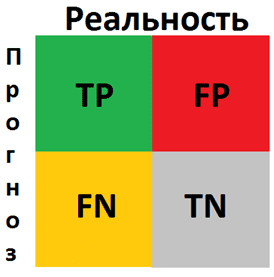

**Тем не менее - грубые прогнозы модель позволяет строить**